In [9]:
import PIL.Image as Image
import numpy as np
import copy
from os import listdir
from os.path import isfile, join
import Levenshtein as leven
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pylab

In [2]:
mypath = "database/"
data_name = [f for f in listdir(mypath) if isfile(join(mypath, f)) and ".pgm" in f]
data = {}
curr_id = 0
classe_of_id = {}
id_of_classe = {}
for f in data_name:
    print("Processing", f)
    img = Image.open(mypath+f)
    classe_name = f.split("-")[0]
    if not classe_name in id_of_classe:
        id_of_classe[classe_name] = curr_id
        classe_of_id[curr_id] = classe_name
        curr_id += 1
    the_id = id_of_classe[classe_name]
    if not the_id in data:
        data[the_id] = []
    data[the_id].append((f,img,np.array(list(img.getdata())).reshape((img.height,img.width))))

Processing spring-2.pgm
Processing device9-20.pgm
Processing teddy-7.pgm
Processing device6-9.pgm
Processing lmfish-18.pgm
Processing device4-5.pgm
Processing tree-3.pgm
Processing device1-6.pgm
Processing cup-1.pgm
Processing bird-5.pgm
Processing sea_snake-8.pgm
Processing device9-18.pgm
Processing octopus-1.pgm
Processing Heart-1.pgm
Processing apple-2.pgm
Processing apple-6.pgm
Processing bell-7.pgm
Processing truck-7.pgm
Processing Glas-7.pgm
Processing cellular_phone-9.pgm
Processing device9-3.pgm
Processing truck-1.pgm
Processing personal_car-1.pgm
Processing beetle-10.pgm
Processing chopper-3.pgm
Processing lmfish-16.pgm
Processing hat-3.pgm
Processing device7-3.pgm
Processing HCircle-3.pgm
Processing sea_snake-6.pgm
Processing beetle-16.pgm
Processing HCircle-2.pgm
Processing bat-6.pgm
Processing Comma-3.pgm
Processing Bone-2.pgm
Processing brick-9.pgm
Processing lizzard-6.pgm
Processing device4-16.pgm
Processing jar-4.pgm
Processing lizzard-8.pgm
Processing device0-8.pgm
Proc

In [12]:
classe_of_id

{0: 'spring',
 1: 'device9',
 2: 'teddy',
 3: 'device6',
 4: 'lmfish',
 5: 'device4',
 6: 'tree',
 7: 'device1',
 8: 'cup',
 9: 'bird',
 10: 'sea_snake',
 11: 'octopus',
 12: 'Heart',
 13: 'apple',
 14: 'bell',
 15: 'truck',
 16: 'Glas',
 17: 'cellular_phone',
 18: 'personal_car',
 19: 'beetle',
 20: 'chopper',
 21: 'hat',
 22: 'device7',
 23: 'HCircle',
 24: 'bat',
 25: 'Comma',
 26: 'Bone',
 27: 'brick',
 28: 'lizzard',
 29: 'jar',
 30: 'device0',
 31: 'rat',
 32: 'carriage',
 33: 'ray',
 34: 'butterfly',
 35: 'device2',
 36: 'key',
 37: 'cattle',
 38: 'flatfish',
 39: 'fountain',
 40: 'deer',
 41: 'horseshoe',
 42: 'device8',
 43: 'spoon',
 44: 'horse',
 45: 'fish',
 46: 'device5',
 47: 'dog',
 48: 'crown',
 49: 'guitar',
 50: 'pencil',
 51: 'device3',
 52: 'elephant',
 53: 'shoe',
 54: 'Misk',
 55: 'fork',
 56: 'car',
 57: 'stef',
 58: 'camel',
 59: 'chicken',
 60: 'pocket',
 61: 'frog',
 62: 'turtle',
 63: 'children',
 64: 'hammer',
 65: 'watch',
 66: 'bottle',
 67: 'classic',
 68

[]

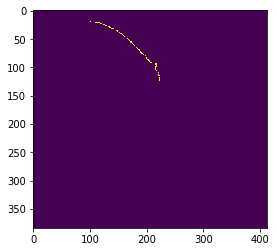

In [8]:
img = data[24][2][1]
contour,_ = extract_contour(np.asarray(img))
plt.imshow(np.asarray(show_contour(img,contour)))
plt.plot()

[Path(array([[ 101.        ,   19.15686275],
        [ 101.84313725,   20.        ],
        [ 102.        ,   20.15686275],
        ..., 
        [ 100.        ,   20.15686275],
        [ 100.15686275,   20.        ],
        [ 101.        ,   19.15686275]]), None),
 Path(array([[ 259.        ,  261.84313725],
        [ 258.84313725,  262.        ],
        [ 258.84313725,  263.        ],
        [ 258.84313725,  264.        ],
        [ 259.        ,  264.15686275],
        [ 259.15686275,  264.        ],
        [ 259.15686275,  263.        ],
        [ 259.15686275,  262.        ],
        [ 259.        ,  261.84313725]]), None)]

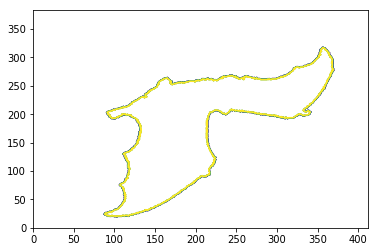

In [16]:
contour = pylab.contour(img)
contour.collections[0].get_paths()

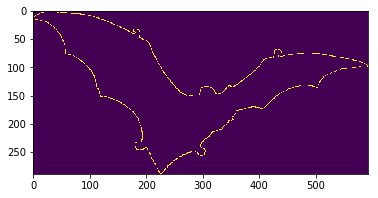

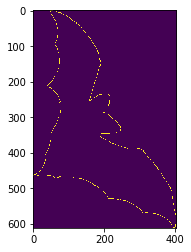

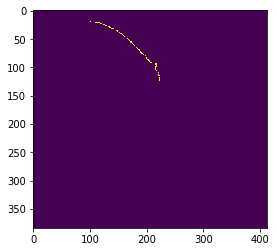

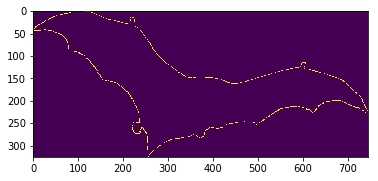

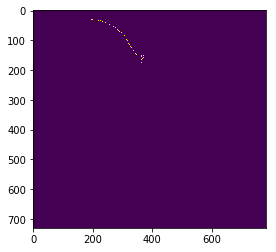

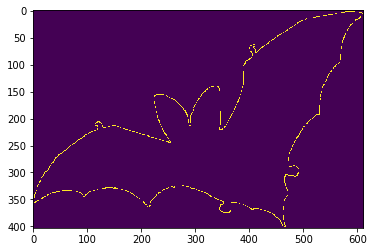

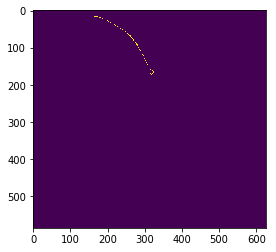

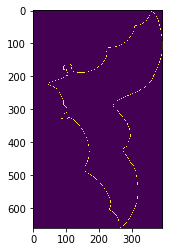

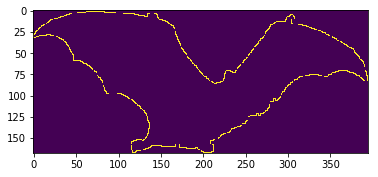

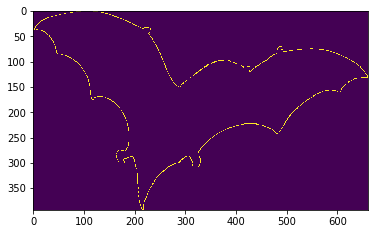

KeyboardInterrupt: 

In [17]:
corr = []
for i,(_,img,pix_map1) in enumerate(data[24]+data[14]):
    contour1,freeman1 = extract_contour(pix_map1)
    plt.imshow(np.asarray(show_contour(img,contour1)))
    plt.show()
    corr.append([])
    for j,(n,_,pix_map2) in enumerate(data[24]+data[14]):
        contour2,freeman2 = extract_contour(pix_map2)
        d = leven.distance(freeman1,freeman2)
        corr[-1].append(d)

corr = np.array(corr)
plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.colorbar(orientation='vertical')
plt.show()

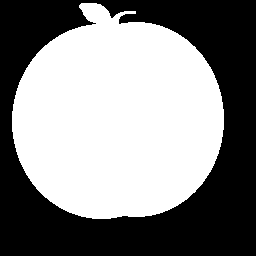

In [22]:
img,pix_map = data[13][0]
img

In [25]:
contour,freeman = extract_contour(pix_map)
print(contour)
show_contour(img,contour)

(3, 81)
([(3, 81)], '0')


TypeError: unhashable type: 'list'

In [4]:
dirs = [(0,1),(1,0),(0,-1),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
def show_contour(img, contour):
    img_contour = copy.deepcopy(img)
    contour = set(copy.deepcopy(contour))
    for i in range(img.height):
        for j in range(img.width):
            img_contour.putpixel((j,i),255 if (i,j) in contour else 0)
    return img_contour

def is_in_contour(pix_map, point):
    i,j = point
    
    if i < 0 or i >= pix_map.shape[0]:
        return False
    if j < 0 or j >= pix_map.shape[1]:
        return False
    if pix_map[i][j] == 0.0:
        return False
    
    if i == 0 or i == pix_map.shape[0]-1:
        return True
    if j == 0 or j == pix_map.shape[1]-1:
        return True
    
    global dirs
    for the_dir in dirs:
        k,l = i+the_dir[0],j+the_dir[1]
        if pix_map[k][l] != 255.0:
            return True
        
    return False

def extract_contour(pix_map):
    global dirs
    starting_point = (-1,-1)
    for i in range(pix_map.shape[0]):
        for j in range(pix_map.shape[1]):
            if pix_map[i][j] != 0.0:
                starting_point = (i,j)
                break
        if starting_point != (-1,-1):
            break
            
    if starting_point == (-1,-1):
        print("All Black")
        return
    
    seen = {}
    curr_point = starting_point
    
    contour = []
    freeman = []
    
    while not curr_point in seen:
        contour.append(curr_point)
        
        next_point = curr_point
        
        update = False
        
        for (i_dir,the_dir) in enumerate(dirs):
            next_point = (curr_point[0]+the_dir[0],curr_point[1]+the_dir[1])
            if (not next_point in seen or next_point == starting_point) and is_in_contour(pix_map,next_point):
                freeman.append(i_dir)
                update = True
                break
        
        seen[curr_point] = True
        if update:
            curr_point = next_point
    return contour,''.join(map(str,freeman))

In [3]:
import cv2
import numpy as np

In [4]:
test_img = np.array([
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 1, 0, 0, 0, 1, 1],
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

], dtype=np.uint8)


In [8]:
cv2.findContours(test_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8), [array([[[2, 1]],
  
         [[1, 3]],
  
         [[2, 1]],
  
         [[4, 3]],
  
         [[6, 5]],
  
         [[9, 3]],
  
         [[4, 4]]], dtype=int32)], array([[[-1, -1, -1, -1]]], dtype=int32))